# Exploratory Data Analysis on Elaad database
Author: Javier S.O.

Date: Nov 2022

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from tqdm.notebook import tqdm
import seaborn as sns

## Data Description
#### Data: Transactions
* **TransactionID**: The unique transaction code.
* **ChargePointID**: The unique point of the charging station.
* **ConnectorID**: Indicates what connector was used for the transactions.
* **UTCTransactionStart**: The moment the transaction was started (logged in locale time zone)
* **UTCTransactionStop**: The moment the plug was disconnected and the transaction was stopped
* **StartCard**: The RFID card (hashed) which has been used to start a transaction
* **ConnectedTime**: Total time wherein energy transfer took place.
* **ChargeTime**: Total time wherein energy transfer took place
* **TotalEnergy**: The total energy demand (kWh) per session
* **MaxPower**: The maximum charging rate (kW) during a session

In [6]:
df_eld = pd.read_csv("data/elaadnl_open_ev_datasets.csv", parse_dates = ["UTCTransactionStart", "UTCTransactionStop"])

# Command to generate. It is not deterministic
# python3 SDG_sample_generate.py -start_date 01/01/2015 -end_date 31/12/2015 -use default -model AC -lambdamod poisson_fit -verbose 3
df_sdg  = pd.read_csv("data/data-SDG/0 Generated sample (AC,poisson_fit) Horizon =2015-01-01-to-2015-12-31.csv", parse_dates = ["Date"])
df_sdg1 = pd.read_csv("data/data-SDG/1 Generated sample (AC,poisson_fit) Horizon =2015-01-01-to-2015-12-31.csv", parse_dates = ["Date"])

## Compare Elaad to SDG

Comparing the original data (Elaad) against synthetically generated data (SDG).

In [7]:
df_eld.describe()

,TransactionId,Connector,ConnectedTime,ChargeTime,TotalEnergy,MaxPower
count,1.000000e+04,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,3.452817e+06,1.360300,5.822735,2.87803,13.635216,5.589366
std,1.076139e+05,0.480111,7.096361,2.64428,14.282036,3.333663
min,3.261657e+06,1.000000,0.020000,0.02000,0.100000,0.167000
25%,3.360979e+06,1.000000,1.510000,1.25000,4.530000,3.398000
50%,3.452182e+06,1.000000,3.380000,2.24000,7.830000,3.640000
75%,3.547667e+06,2.000000,8.410000,3.50000,18.262500,7.277750
max,3.634120e+06,2.000000,161.170000,25.67000,93.929000,22.500000


In [10]:
df_sdg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362125 entries, 0 to 362124
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Date             362125 non-null  datetime64[ns]
 1   Arrival          362125 non-null  float64       
 2   Connected_time   362125 non-null  float64       
 3   Energy_required  362125 non-null  float64       
 4   AM_specs         362125 non-null  object        
 5   MMc_specs        362125 non-null  object        
 6   MMe_specs        362125 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 19.3+ MB


In [11]:
df_eld.describe(datetime_is_numeric = True)

,TransactionId,Connector,UTCTransactionStart,UTCTransactionStop,ConnectedTime,ChargeTime,TotalEnergy,MaxPower
count,1.000000e+04,10000.000000,10000,10000,10000.000000,10000.00000,10000.000000,10000.000000
mean,3.452817e+06,1.360300,2019-07-11 12:25:16.866000128,2019-07-11 18:14:39.090000128,5.822735,2.87803,13.635216,5.589366
min,3.261657e+06,1.000000,2019-01-01 00:30:00,2019-01-01 08:24:00,0.020000,0.02000,0.100000,0.167000
25%,3.360979e+06,1.000000,2019-04-04 12:43:45,2019-04-04 16:33:00,1.510000,1.25000,4.530000,3.398000
50%,3.452182e+06,1.000000,2019-07-10 08:21:00,2019-07-10 13:31:30,3.380000,2.24000,7.830000,3.640000
75%,3.547667e+06,2.000000,2019-10-22 06:54:00,2019-10-22 13:03:00,8.410000,3.50000,18.262500,7.277750
max,3.634120e+06,2.000000,2019-12-31 21:22:00,2020-01-01 16:00:00,161.170000,25.67000,93.929000,22.500000
std,1.076139e+05,0.480111,NaN,NaN,7.096361,2.64428,14.282036,3.333663


In [12]:
df_sdg.describe(datetime_is_numeric = True)

,Date,Arrival,Connected_time,Energy_required
count,362125,362125.000000,362125.000000,362125.000000
mean,2015-07-12 11:53:18.330963200,13.317831,6.376973,7.517034
min,2015-01-01 00:00:00,0.076923,0.000181,0.000092
25%,2015-04-09 00:00:00,9.220000,2.234599,4.533464
50%,2015-07-17 00:00:00,13.593750,4.501333,7.588365
75%,2015-10-18 00:00:00,17.041667,9.859067,9.843516
max,2015-12-31 00:00:00,23.952381,23.998291,23.965762
std,NaN,4.738733,5.129841,3.899081


In [13]:
df_eld.head()

,TransactionId,ChargePoint,Connector,UTCTransactionStart,UTCTransactionStop,StartCard,ConnectedTime,ChargeTime,TotalEnergy,MaxPower
0,3491779,0abf481c2d3f5866a8fc7feaae460fd0,1,2019-08-27 14:52:00,2019-08-27 17:58:00,0c24de2f8216313f75daf876ec7c2223e17c866462ae41...,3.11,3.10,9.86,3.342
1,3326963,a22a6a745ff09431c3a0cef7373042ee,2,2019-03-01 10:14:00,2019-03-01 13:13:00,fd31273615db1421e4be23b51db9f1c5c904ebed131b5d...,3.00,3.00,9.38,3.440
2,3469263,f4f5e5fbf8297d4889e49f10942b030b,1,2019-07-31 12:54:00,2019-07-31 13:21:00,f876668fd30216c9054a890007143b4d40d13ddd9234c7...,0.46,0.46,1.45,3.160
3,3429356,0f87094588f6330a84f30797f0458fc8,1,2019-06-16 10:55:00,2019-06-16 14:35:00,06776db669a8f444bf7f81edc7fcf6c18c51bfd90eed2f...,3.65,3.65,38.77,10.813
4,3332751,77f3b31920754dac44d2b7400f16bca3,1,2019-03-07 21:21:00,2019-03-08 07:22:00,f88e7e074d5476d4e8a532ae1e1966de2d3f333f3c4453...,10.03,7.15,26.14,3.884


In [14]:
df_sdg.head()

,Date,Arrival,Connected_time,Energy_required,AM_specs,MMc_specs,MMe_specs
0,2015-01-01,0.333333,5.651792,3.265184,Arrival model {mod=poisson_fit variablity=True},Connected time model {mix=normal method=EM},Energy Required model {mix=normal method=EM}
1,2015-01-01,0.666667,2.899778,12.261469,Arrival model {mod=poisson_fit variablity=True},Connected time model {mix=normal method=EM},Energy Required model {mix=normal method=EM}
2,2015-01-01,1.250000,6.539802,9.226315,Arrival model {mod=poisson_fit variablity=True},Connected time model {mix=normal method=EM},Energy Required model {mix=normal method=EM}
3,2015-01-01,1.500000,11.485424,21.873678,Arrival model {mod=poisson_fit variablity=True},Connected time model {mix=normal method=EM},Energy Required model {mix=normal method=EM}
4,2015-01-01,1.750000,4.008516,17.426294,Arrival model {mod=poisson_fit variablity=True},Connected time model {mix=normal method=EM},Energy Required model {mix=normal method=EM}


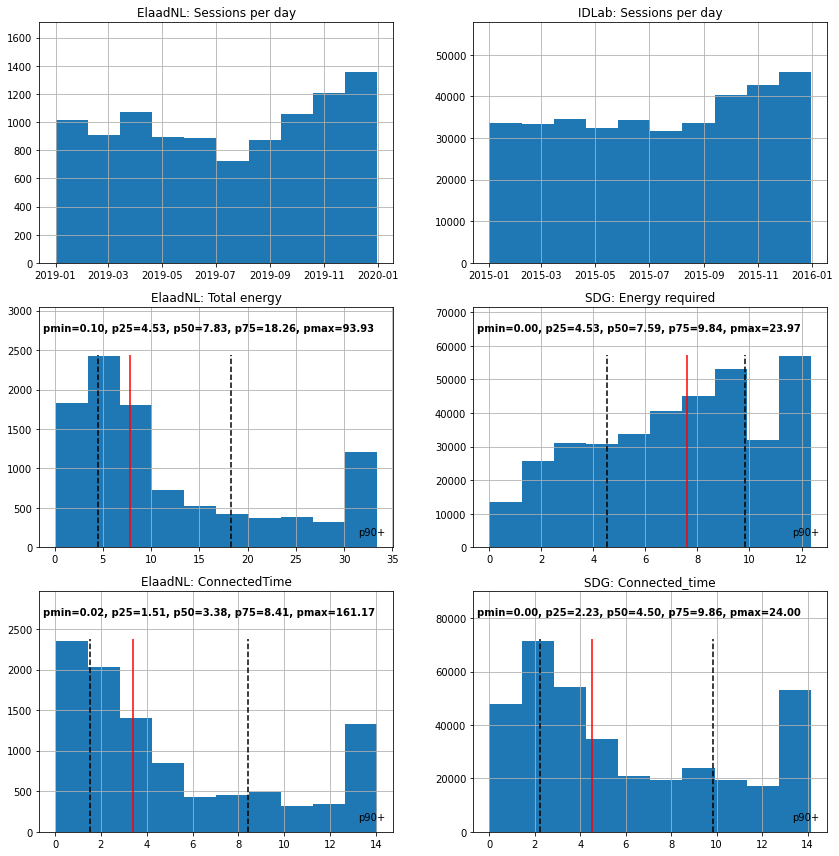

In [15]:
def hist_ev(ax, data, title, bins=None, stats=False):
    p90 = np.percentile(data, 90)
    data_p = data.copy()
    if stats:
        data_p = np.minimum(data, p90)
    ax.hist(data_p, bins=bins)
    ax.set_title(title)
    ax.grid()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    ax.set_ylim([ylim[0], ylim[1]*1.2])
    ylim = ax.get_ylim()
    if stats:
        h_alph = 0.01
        pmin = np.percentile(data, 0)
        p25 = np.percentile(data, 25)
        p50 = np.percentile(data, 50)
        p75 = np.percentile(data, 75)
        pmax = np.percentile(data, 100)
        
        ax.vlines(p25,    ylim[0], ylim[1]*0.8, color="black", ls="--")
        ax.vlines(p50, ylim[0], ylim[1]*0.8, color="red")
        ax.vlines(p75,    ylim[0], ylim[1]*0.8, color="black", ls="--")
        
        ax.text((1-h_alph)*xlim[0]+(h_alph)*xlim[1], ylim[1]*0.9, f"{pmin=:.2f}, {p25=:.2f}, {p50=:.2f}, {p75=:.2f}, {pmax=:.2f}", fontweight="semibold")
        
        h_alph2 = 0.9
        ax.text((1-h_alph2)*xlim[0]+(h_alph2)*xlim[1], ylim[1]*0.05, "p90+")

fig1 = plt.figure(figsize = (12,12))

axs = []
for i in range(6):
    axs.append(fig1.add_subplot(3,2,i+1))

hist_ev(axs[0], df_eld["UTCTransactionStart"].dt.date, "ElaadNL: Sessions per day")
hist_ev(axs[1], df_sdg["Date"].dt.date,                "IDLab: Sessions per day")
hist_ev(axs[2], df_eld["TotalEnergy"],                 "ElaadNL: Total energy",  stats=True)
hist_ev(axs[3], df_sdg["Energy_required"],             "SDG: Energy required",   stats=True)
hist_ev(axs[4], df_eld["ConnectedTime"],               "ElaadNL: ConnectedTime", stats=True)
hist_ev(axs[5], df_sdg["Connected_time"],              "SDG: Connected_time",    stats=True)

fig1.tight_layout()

<Axes: >

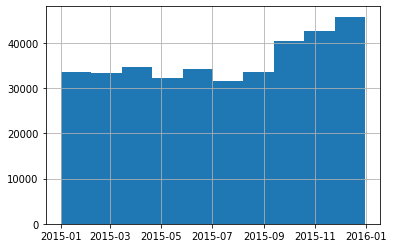

In [16]:
df_sdg["Date"].dt.date.hist()

## Compare two instances of SDG

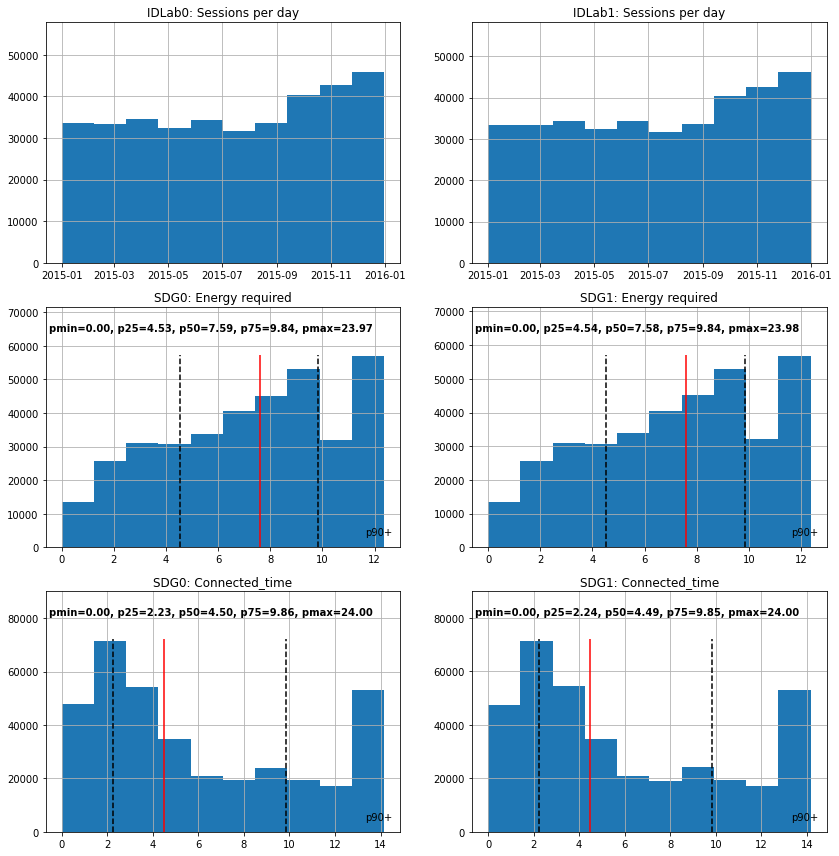

In [17]:
fig1 = plt.figure(figsize = (12,12))

axs = []
for i in range(6):
    axs.append(fig1.add_subplot(3,2,i+1))


hist_ev(axs[0], df_sdg["Date"].dt.date,                 "IDLab0: Sessions per day")
hist_ev(axs[1], df_sdg1["Date"].dt.date,                "IDLab1: Sessions per day")
hist_ev(axs[2], df_sdg["Energy_required"],              "SDG0: Energy required",   stats=True)
hist_ev(axs[3], df_sdg1["Energy_required"],             "SDG1: Energy required",   stats=True)
hist_ev(axs[4], df_sdg["Connected_time"],               "SDG0: Connected_time",    stats=True)
hist_ev(axs[5], df_sdg1["Connected_time"],              "SDG1: Connected_time",    stats=True)

fig1.tight_layout()

In [18]:
df_sdg.head()

,Date,Arrival,Connected_time,Energy_required,AM_specs,MMc_specs,MMe_specs
0,2015-01-01,0.333333,5.651792,3.265184,Arrival model {mod=poisson_fit variablity=True},Connected time model {mix=normal method=EM},Energy Required model {mix=normal method=EM}
1,2015-01-01,0.666667,2.899778,12.261469,Arrival model {mod=poisson_fit variablity=True},Connected time model {mix=normal method=EM},Energy Required model {mix=normal method=EM}
2,2015-01-01,1.250000,6.539802,9.226315,Arrival model {mod=poisson_fit variablity=True},Connected time model {mix=normal method=EM},Energy Required model {mix=normal method=EM}
3,2015-01-01,1.500000,11.485424,21.873678,Arrival model {mod=poisson_fit variablity=True},Connected time model {mix=normal method=EM},Energy Required model {mix=normal method=EM}
4,2015-01-01,1.750000,4.008516,17.426294,Arrival model {mod=poisson_fit variablity=True},Connected time model {mix=normal method=EM},Energy Required model {mix=normal method=EM}


In [19]:
df_sdg1.head()

,Date,Arrival,Connected_time,Energy_required,AM_specs,MMc_specs,MMe_specs
0,2015-01-01,0.333333,1.118744,12.402520,Arrival model {mod=poisson_fit variablity=True},Connected time model {mix=normal method=EM},Energy Required model {mix=normal method=EM}
1,2015-01-01,0.666667,10.246297,12.470414,Arrival model {mod=poisson_fit variablity=True},Connected time model {mix=normal method=EM},Energy Required model {mix=normal method=EM}
2,2015-01-01,1.333333,7.363992,13.598598,Arrival model {mod=poisson_fit variablity=True},Connected time model {mix=normal method=EM},Energy Required model {mix=normal method=EM}
3,2015-01-01,1.666667,4.582029,19.010151,Arrival model {mod=poisson_fit variablity=True},Connected time model {mix=normal method=EM},Energy Required model {mix=normal method=EM}
4,2015-01-01,2.200000,4.413311,9.066074,Arrival model {mod=poisson_fit variablity=True},Connected time model {mix=normal method=EM},Energy Required model {mix=normal method=EM}


In [20]:

df_eld.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   TransactionId        10000 non-null  int64         
 1   ChargePoint          10000 non-null  object        
 2   Connector            10000 non-null  int64         
 3   UTCTransactionStart  10000 non-null  datetime64[ns]
 4   UTCTransactionStop   10000 non-null  datetime64[ns]
 5   StartCard            10000 non-null  object        
 6   ConnectedTime        10000 non-null  float64       
 7   ChargeTime           10000 non-null  float64       
 8   TotalEnergy          10000 non-null  float64       
 9   MaxPower             10000 non-null  float64       
dtypes: datetime64[ns](2), float64(4), int64(2), object(2)
memory usage: 781.4+ KB


## Deep dive into Elaad

<Axes: >

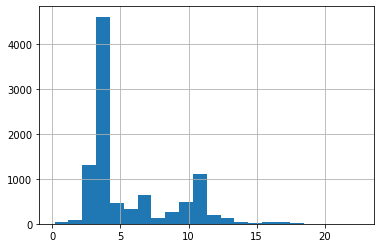

In [21]:
df_eld["MaxPower"].hist(bins = 22)

In [22]:
# Max Concurrent Sessions
minute_delta = 15
start_dt = df_eld["UTCTransactionStart"].min()
df_eld["TransactionStartAbsSec"] = (df_eld["UTCTransactionStart"] - start_dt).dt.total_seconds()
df_eld["TransactionStopAbsSec"] = (df_eld["UTCTransactionStop"] - start_dt).dt.total_seconds()

df_eld["TransactionStartTS"] = (df_eld["TransactionStartAbsSec"] // (60*15)).astype(int)
df_eld["TransactionStopTS"] = (df_eld["TransactionStopAbsSec"] // (60*15)).astype(int)

endTS = df_eld["TransactionStopTS"].max().astype(int)

num_visits = np.zeros(endTS)
for i in tqdm(range(endTS)):
    num_visits[i] = len(df_eld[(df_eld["TransactionStartTS"] <= i) &\
                               (i < df_eld["TransactionStopTS"])])

print(num_visits.max())

  0%|          | 0/35102 [00:00<?, ?it/s]

21.0


168


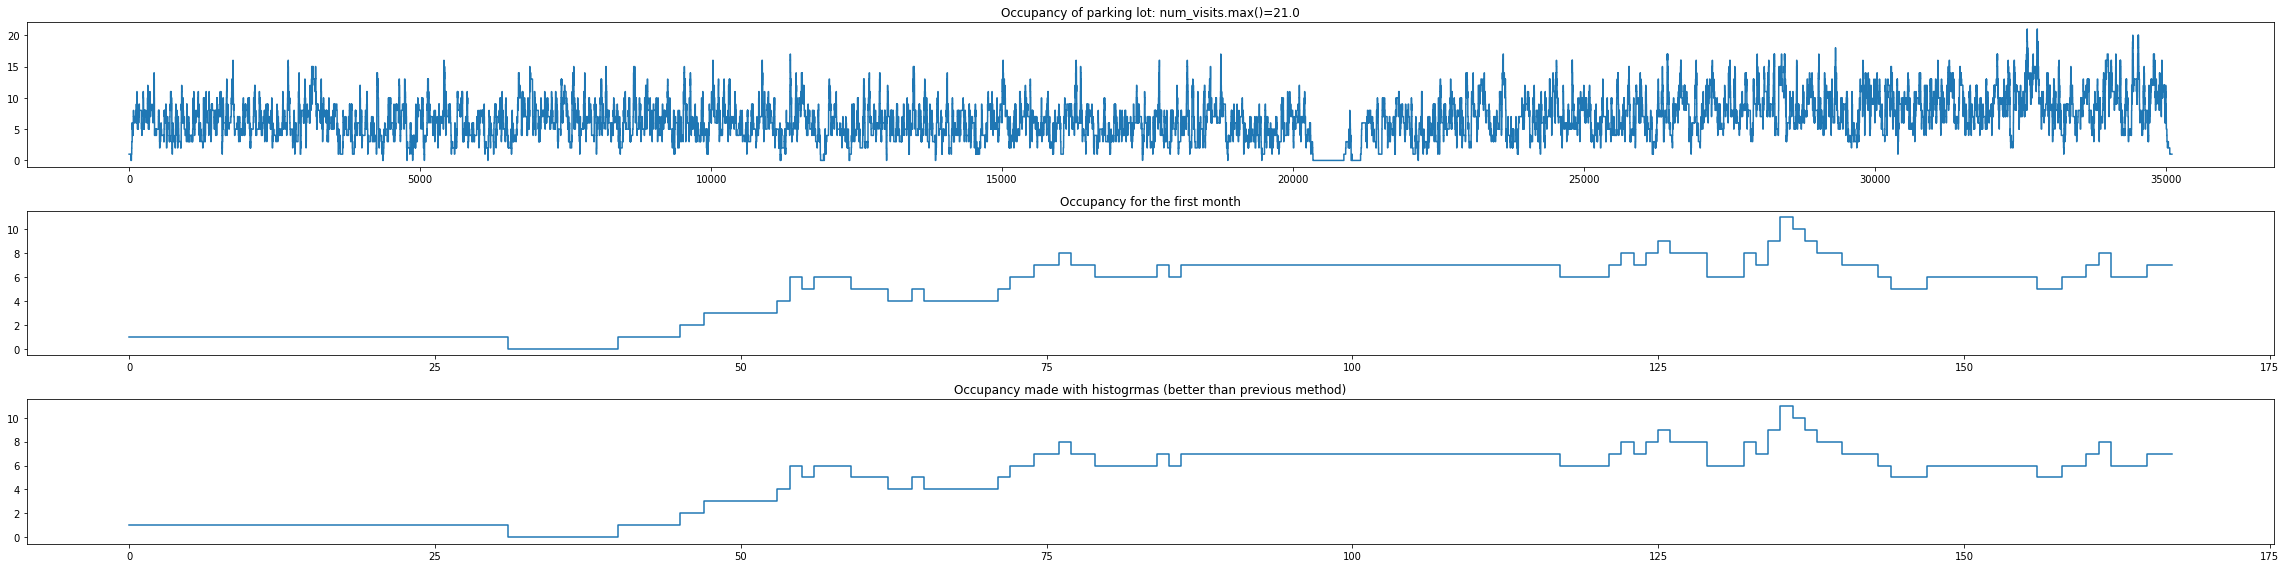

In [23]:
fig1 = plt.figure(figsize=(32,8))
ax1 = fig1.add_subplot(3,1,1)
ax2 = fig1.add_subplot(3,1,2)
ax3 = fig1.add_subplot(3,1,3)
ax1.step(range(endTS), num_visits, where='post')
numTS = int(24*7*4/4)
print(numTS)
ax2.step(range(numTS), num_visits[0:numTS], where='post')
hist_start, _ = np.histogram(df_eld[df_eld["TransactionStartTS"] < numTS]["TransactionStartTS"], bins=list(range(numTS+1)))
hist_stop, _  = np.histogram(df_eld[df_eld["TransactionStartTS" ] < numTS]["TransactionStopTS"], bins=list(range(numTS+1)))
ax3.step(range(numTS), (hist_start - hist_stop).cumsum(), where='post')
ax1.set_title(f"Occupancy of parking lot: {num_visits.max()=}")
ax2.set_title(f"Occupancy for the first month")
ax3.set_title(f"Occupancy made with histogrmas (better than previous method)")
fig1.tight_layout()

In [24]:
print(df_eld["ChargePoint"].nunique())
print(df_eld["Connector"].nunique())
print(df_eld["StartCard"].nunique())
df_eld["ChargePointId"] = df_eld.apply(lambda x: x.ChargePoint + str(x.Connector), axis=1)
print(df_eld["ChargePointId"].nunique())

850
2
6470
1293


In [25]:
df_eld["ChargePoint"].head()

0    0abf481c2d3f5866a8fc7feaae460fd0
1    a22a6a745ff09431c3a0cef7373042ee
2    f4f5e5fbf8297d4889e49f10942b030b
3    0f87094588f6330a84f30797f0458fc8
4    77f3b31920754dac44d2b7400f16bca3
Name: ChargePoint, dtype: object

## Investigating average power

Text(0.5, 1.0, 'Histogram of average powers')

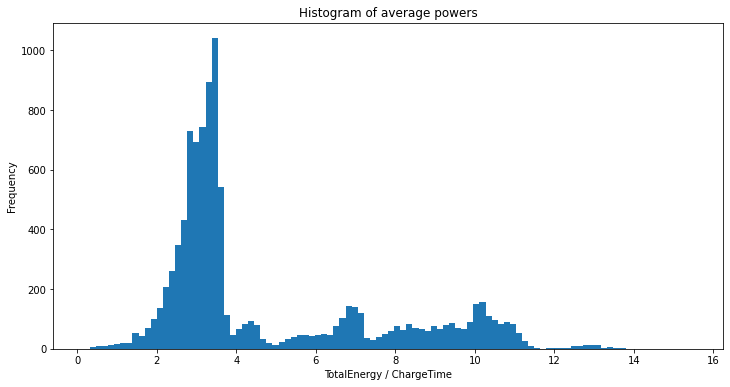

In [26]:
df_eld["AvgPwr"] = df_eld["TotalEnergy"] / df_eld["ChargeTime"]
fig1 = plt.figure(figsize=(12,6))
ax1 = fig1.add_subplot(1,1,1)
avg_pwr = df_eld["AvgPwr"]
ax1.hist(avg_pwr, bins = 100);
ax1.set_xlabel("TotalEnergy / ChargeTime")
ax1.set_ylabel("Frequency")
ax1.set_title("Histogram of average powers")
#ax1.set_xticks(np.arange(0, 0.8, 0.05));

Peaks at [ 3.311115   6.900735  10.1654325] with values [0.53305882 0.08132475 0.08412189]


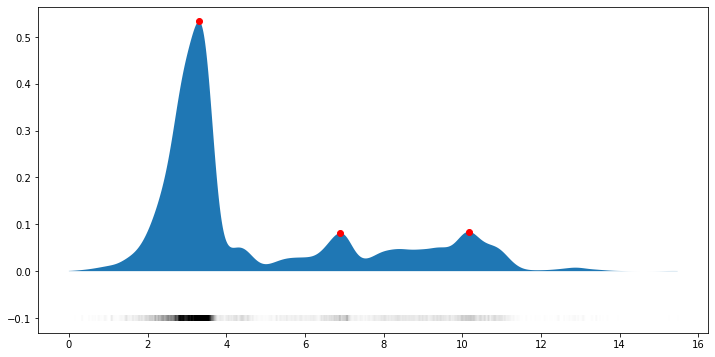

In [27]:
# Fix KDE for avg pwr
from scipy.stats import norm
from sklearn.neighbors import KernelDensity
from scipy.signal import find_peaks

X = np.expand_dims(avg_pwr,1)
kde = KernelDensity(kernel="gaussian", bandwidth=0.2)
kde.fit(X)

X_test = np.expand_dims(np.linspace(0, max(avg_pwr), 1001), 1)
logprob = kde.score_samples(X_test)
prob = np.exp(logprob)
peaks_idx, _ = find_peaks(prob, height = 0.07)
print(f"Peaks at {X_test.squeeze()[peaks_idx]} with values {prob[peaks_idx]}")
fig1 = plt.figure(figsize=(12,6))
ax1 = fig1.add_subplot(1,1,1)
ax1.fill_between(X_test.squeeze(), prob);
ax1.plot(X.squeeze(), np.full_like(X, -0.1), '|k', markeredgewidth=0.01)
ax1.scatter(X_test.squeeze()[peaks_idx], prob[peaks_idx], color = 'red')

Text(0.5, 0, 'Charge Time (h)')

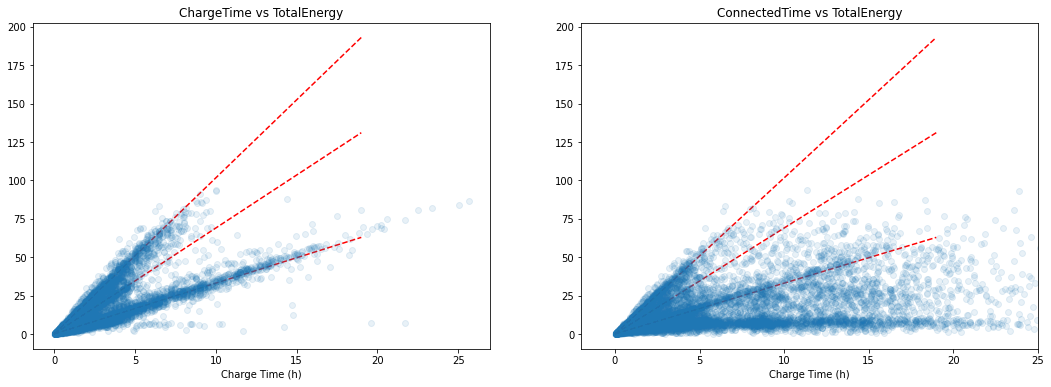

In [28]:
fig1 = plt.figure(figsize=(18,6))
ax1 = fig1.add_subplot(1,2,1)
ax2 = fig1.add_subplot(1,2,2)
x = np.arange(0,20,1)
pwr_peaks = X_test.squeeze()[peaks_idx]
y1 = pwr_peaks[0]*x
y2 = pwr_peaks[1]*x
y3 = pwr_peaks[2]*x

ax1.scatter(df_eld["ChargeTime"], df_eld["TotalEnergy"], alpha=0.1)
ax1.plot(x, y1, color="red", ls = "--", zorder=-1, label=f"{pwr_peaks[0]} W")
ax1.plot(x, y2, color="red", ls = "--", zorder=-1, label=f"{pwr_peaks[1]} W")
ax1.plot(x, y3, color="red", ls = "--", zorder=-1, label=f"{pwr_peaks[2]} W")
ax2.scatter(df_eld["ConnectedTime"], df_eld["TotalEnergy"], alpha=0.1 )
ax2.plot(x, y1, color="red", ls = "--", zorder=-1, label=f"{pwr_peaks[0]} W")
ax2.plot(x, y2, color="red", ls = "--", zorder=-1, label=f"{pwr_peaks[1]} W")
ax2.plot(x, y3, color="red", ls = "--", zorder=-1, label=f"{pwr_peaks[2]} W")
ax2.set_xlim([-2, 25])

# Formatting
ax1.set_title("ChargeTime vs TotalEnergy")
ax1.set_xlabel("Charge Time (h)")
ax2.set_title("ConnectedTime vs TotalEnergy")
ax2.set_xlabel("Charge Time (h)")


In [29]:
print(f"Most common charging power {X_test.squeeze()[peaks_idx]} W")

Most common charging power [ 3.311115   6.900735  10.1654325] W


In [37]:
df_sdg["day"] = df_sdg["Date"].dt.day
df_sdg["month"] = df_sdg["Date"].dt.month
count_sdg = df_sdg.groupby(["day", "month"]).agg(count = ("Date", "count")).reset_index()
print(count_sdg.columns)
df_sdg1["day"] = df_sdg1["Date"].dt.day
df_sdg1["month"] = df_sdg1["Date"].dt.month
count_sdg1 = df_sdg1.groupby(["day", "month"]).agg(count = ("Date", "count")).reset_index()
df_eld["day"] = df_eld["UTCTransactionStart"].dt.day
df_eld["month"] = df_eld["UTCTransactionStart"].dt.month
count_eld = df_eld.groupby(["day", "month"]).agg(count = ("UTCTransactionStart", "count")).reset_index()


Index(['day', 'month', 'count'], dtype='object')


Text(0.5, 0.98, 'Boxplot of number of sessions per month')

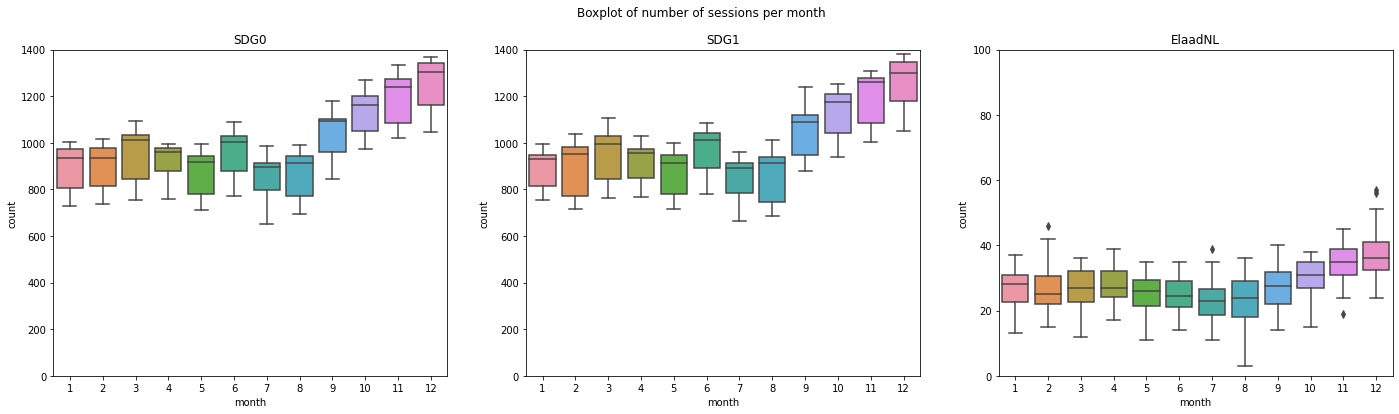

In [49]:
fig1 = plt.figure(figsize=(24,6))
ax1 = fig1.add_subplot(1,3,1)
ax2 = fig1.add_subplot(1,3,2)
ax3 = fig1.add_subplot(1,3,3)

sns.boxplot(x="month", y="count", data=count_sdg, ax=ax1)
sns.boxplot(x="month", y="count", data=count_sdg1, ax=ax2)
sns.boxplot(x="month", y="count", data=count_eld, ax=ax3)

ax1.set_title("SDG0")
ax2.set_title("SDG1")
ax3.set_title("ElaadNL")

ax1.set_ylim([0, 1400])
ax2.set_ylim([0, 1400])
ax3.set_ylim([0, 100])


# Set title of figure
fig1.suptitle("Boxplot of number of sessions per month")

In [50]:
df_eld.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   TransactionId           10000 non-null  int64         
 1   ChargePoint             10000 non-null  object        
 2   Connector               10000 non-null  int64         
 3   UTCTransactionStart     10000 non-null  datetime64[ns]
 4   UTCTransactionStop      10000 non-null  datetime64[ns]
 5   StartCard               10000 non-null  object        
 6   ConnectedTime           10000 non-null  float64       
 7   ChargeTime              10000 non-null  float64       
 8   TotalEnergy             10000 non-null  float64       
 9   MaxPower                10000 non-null  float64       
 10  TransactionStartAbsSec  10000 non-null  float64       
 11  TransactionStopAbsSec   10000 non-null  float64       
 12  TransactionStartTS      10000 non-null  int64  

(0.0, 80.0)

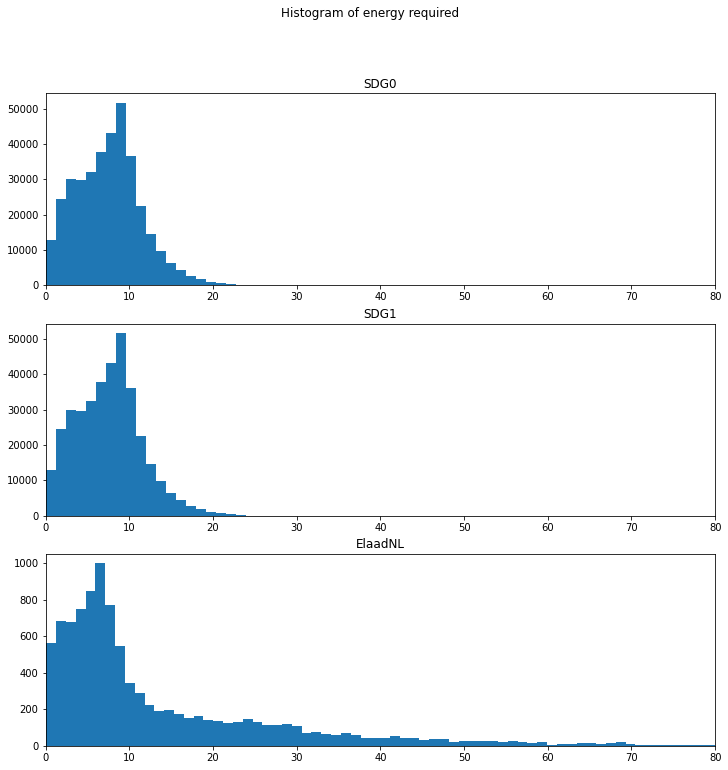

In [64]:
fig1 = plt.figure(figsize=(12,12))
ax1 = fig1.add_subplot(3,1,1)
ax2 = fig1.add_subplot(3,1,2)
ax3 = fig1.add_subplot(3,1,3)
bins = 20

ax1.hist(df_sdg["Energy_required"], bins = bins)
ax2.hist(df_sdg1["Energy_required"], bins = bins)
ax3.hist(df_eld["TotalEnergy"], bins = bins*4)

fig1.suptitle("Histogram of energy required")
ax1.set_title("SDG0")
ax2.set_title("SDG1")
ax3.set_title("ElaadNL")

ax1.set_xlim([0, 80])
ax2.set_xlim([0, 80])
ax3.set_xlim([0, 80])

Text(0.5, 0.98, 'Histogram of connected time')

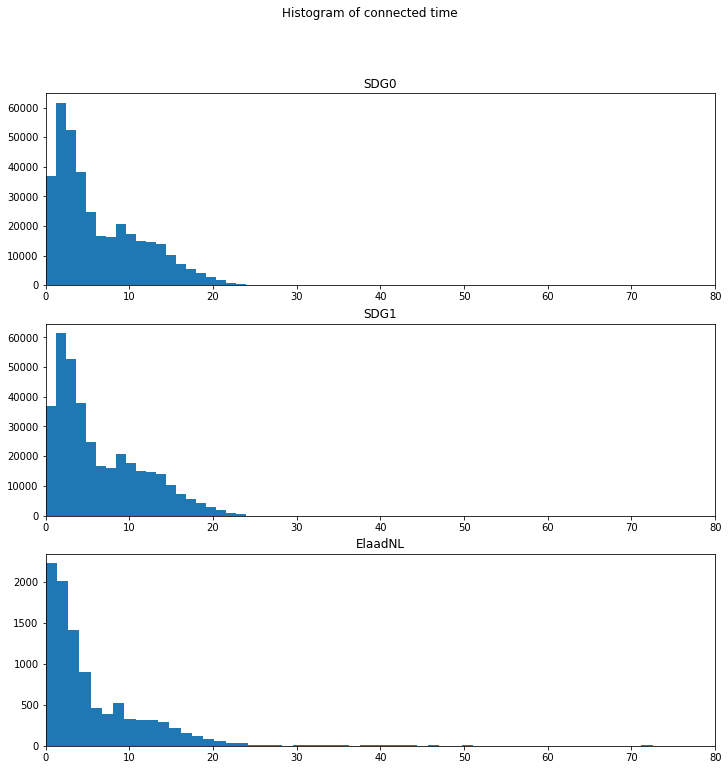

In [72]:

fig1 = plt.figure(figsize=(12,12))
ax1 = fig1.add_subplot(3,1,1)
ax2 = fig1.add_subplot(3,1,2)
ax3 = fig1.add_subplot(3,1,3)
bins = 20

ax1.hist(df_sdg["Connected_time"], bins = bins)
ax2.hist(df_sdg1["Connected_time"], bins = bins)
ax3.hist(df_eld["ConnectedTime"], bins = bins*6)

ax1.set_xlim([0, 80])
ax2.set_xlim([0, 80])
ax3.set_xlim([0, 80])

ax1.set_title("SDG0")
ax2.set_title("SDG1")
ax3.set_title("ElaadNL")

fig1.suptitle("Histogram of connected time")